In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [2]:
dfTrain = pd.read_csv('fraud_train.csv')
pd.set_option('display.max_columns', None)
dfTrain.head()

X  id_tanggal_transaksi_awal  tanggal_transaksi_awal  tipe_kartu  \
0  4676                    2457646                 2457726         111   
1   788                    2457419                 2457507         111   
2  1520                    2457521                 2457612           2   
3  9346                    2457659                 2457746         103   
4  2914                    2457311                 2457385           0   

   id_merchant  nama_merchant  tipe_mesin  tipe_transaksi  nama_transaksi  \
0           -2           1798     2605127              26              10   
1           -2           1798          -3             156              12   
2           -2           1798          -3             156              12   
3        75336            249     2806174              58               6   
4           -2           1798     2334932              26              10   

   nilai_transaksi  id_negara  nama_negara  nama_kota  lokasi_mesin  \
0        2200000.0         96            5        265          4137   
1        2500000.0         96            5        121          1264   
2        1200000.0         96            5        101          1283   
3         320000.0         96            5        239          7049   
4         150000.0         96            5         69          3425   

   pemilik_mesin  waktu_transaksi  kuartal_transaksi  kepemilikan_kartu  \
0            613           193955                  4                  2   
1           2196            73140                  2                  1   
2           2049           140216                  3                  1   
3            588           155117                  3                  2   
4            613           143339                  3                  2   

   nama_channel  id_channel  flag_transaksi_finansial  status_transaksi  \
0             1           9                     False                 3   
1             5           8                     False                 3   
2             5           8                     False                 3   
3             2           4                     False                 3   
4             1           9                     False                 3   

   bank_pemilik_kartu  rata_rata_nilai_transaksi  maksimum_nilai_transaksi  \
0                 999               1.332293e+06                 9750000.0   
1                 999               1.369048e+06                10000000.0   
2                 999               1.552346e+07               100000000.0   
3                 999               7.117647e+05                 6884408.0   
4                 999               6.179683e+05                 2500000.0   

   minimum_nilai_transaksi  rata_rata_jumlah_transaksi  flag_transaksi_fraud  
0                  10000.0                        2.73                     0  
1                  30000.0                        2.33                     1  
2                  41804.0                        2.40                     0  
3                  10000.0                        1.98                     0  
4                 100000.0                        1.46                     0

#### paling mudah lihat berdasarkan value_counts()
###### Independent Variabel
1. X (Mutinomial Variabel)
2. id_tanggal_transaksi_awal (Multinomial Variabel)
3. tanggal_transaksi_awal (Multinomial Variabel)
4. tipe_kartu (Multinomial Variabel)
5. id_merchant (Multinomial Variabell)
6. nama_merchant (Multinomial Variabel)
7. tipe_mesin (Multinomial Variabel)
8. tipe_transaksi (Multinomial Variabel)
9. nama_transaksi (Multinomial Variabel)
10. nilai_transaksi (Kontinus Variabel)
11. id_negara (Multinomial Variabel)
12. nama_negara (Multinomial Variabel)
13. nama_kota (Multinomial Variabel)
14. lokasi_mesin (Multinomial Variabel)
15. pemilik_mesin (Multinomial Variabel)
16. waktu_transaksi (Kontinus Variabel)
17. kuartal_transaksi (Multinomial Variabel)
18. kepemilikan_kartu (Multinomial Variabel)
19. nama_channel (Multinomial Variabel)
20. id_channel (Multinomial Variabel)
21. flag_transaksi_finansial (Univariabel)
22. status_transaksi (Univariabel)
23. bank_pemilik_kartu (Univariabel)
24. rata_rata_nilai_transaksi (Kontinus Variabel)
25. maksimum_nilai_transaksi (Kontinus Variabel)
26. minimum_nilai_transaksi (Kontinus Variabel)
27. rata_rata_jumlah_transaksi (Binary Variabel)
###### Dependent Variabel
28. flag_transaksi_fraund (Binary Variabel)

In [3]:
dfTrain['rata_rata_nilai_transaksi'].value_counts()

1.505703e+06    43
6.333762e+05    32
7.601821e+05    32
2.564533e+06    29
1.884018e+06    29
                ..
1.582065e+05     1
3.661629e+05     1
3.210714e+06     1
5.028652e+05     1
4.975410e+05     1
Name: rata_rata_nilai_transaksi, Length: 3090, dtype: int64

In [4]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 28 columns):
X                             13125 non-null int64
id_tanggal_transaksi_awal     13125 non-null int64
tanggal_transaksi_awal        13125 non-null int64
tipe_kartu                    13125 non-null int64
id_merchant                   13125 non-null int64
nama_merchant                 13125 non-null int64
tipe_mesin                    13125 non-null int64
tipe_transaksi                13125 non-null int64
nama_transaksi                13125 non-null int64
nilai_transaksi               13125 non-null float64
id_negara                     13125 non-null int64
nama_negara                   13125 non-null int64
nama_kota                     13125 non-null int64
lokasi_mesin                  13125 non-null int64
pemilik_mesin                 13125 non-null int64
waktu_transaksi               13125 non-null int64
kuartal_transaksi             13125 non-null int64
kepemilikan_kartu     

In [5]:
dfTrain.tail()

X  id_tanggal_transaksi_awal  tanggal_transaksi_awal  tipe_kartu  \
13120   9482                    2457523                 2457583         111   
13121   6073                    2457459                 2457517         111   
13122  12164                    2457620                 2457712         103   
13123   5264                    2457514                 2457526         111   
13124   7335                    2457426                 2457522         103   

       id_merchant  nama_merchant  tipe_mesin  tipe_transaksi  nama_transaksi  \
13120           -2           1798     1809533             385              11   
13121           -2           1798      219609              26              10   
13122           -2           1798          -3             156              12   
13123           -2           1798     3067053              26              10   
13124           -2           1798     2117453             301              16   

       nilai_transaksi  id_negara  nama_negara  nama_kota  lokasi_mesin  \
13120         100000.0         96            5        128          2259   
13121        2500000.0         96            5        128          4339   
13122        1250000.0         96            5        149          7729   
13123         500000.0         96            5        128          8032   
13124         300000.0         96            5        128          3061   

       pemilik_mesin  waktu_transaksi  kuartal_transaksi  kepemilikan_kartu  \
13120            613           140547                  3                  2   
13121            613           172446                  3                  2   
13122            617           141836                  3                  1   
13123            613            71451                  2                  2   
13124            613           175350                  3                  2   

       nama_channel  id_channel  flag_transaksi_finansial  status_transaksi  \
13120             1           9                     False                 3   
13121             1           9                     False                 3   
13122             5           8                     False                 3   
13123             1           9                     False                 3   
13124             1           9                     False                 3   

       bank_pemilik_kartu  rata_rata_nilai_transaksi  \
13120                 999               2.917987e+06   
13121                 999               1.914437e+06   
13122                 999               3.417045e+05   
13123                 999               7.644508e+05   
13124                 999               8.483696e+05   

       maksimum_nilai_transaksi  minimum_nilai_transaksi  \
13120                 7400000.0                  26500.0   
13121                20000000.0                 100000.0   
13122                 1000000.0                 100000.0   
13123                 3000000.0                  25000.0   
13124                 6375000.0                  25000.0   

       rata_rata_jumlah_transaksi  flag_transaksi_fraud  
13120                        2.57                     0  
13121                        2.73                     0  
13122                        1.33                     1  
13123                        1.62                     0  
13124                        1.79                     0

In [6]:
dfTrain1 = dfTrain.copy()
dfTrain1.drop(['X', 'id_tanggal_transaksi_awal', 'tanggal_transaksi_awal', 'id_merchant', 'nama_merchant', 'nama_transaksi',
               'nama_negara', 'pemilik_mesin', 'nama_channel', 'flag_transaksi_finansial', 'status_transaksi', 
               'bank_pemilik_kartu'], axis=1, inplace=True)
dfTrain1.head()

tipe_kartu  tipe_mesin  tipe_transaksi  nilai_transaksi  id_negara  \
0         111     2605127              26        2200000.0         96   
1         111          -3             156        2500000.0         96   
2           2          -3             156        1200000.0         96   
3         103     2806174              58         320000.0         96   
4           0     2334932              26         150000.0         96   

   nama_kota  lokasi_mesin  waktu_transaksi  kuartal_transaksi  \
0        265          4137           193955                  4   
1        121          1264            73140                  2   
2        101          1283           140216                  3   
3        239          7049           155117                  3   
4         69          3425           143339                  3   

   kepemilikan_kartu  id_channel  rata_rata_nilai_transaksi  \
0                  2           9               1.332293e+06   
1                  1           8               1.369048e+06   
2                  1           8               1.552346e+07   
3                  2           4               7.117647e+05   
4                  2           9               6.179683e+05   

   maksimum_nilai_transaksi  minimum_nilai_transaksi  \
0                 9750000.0                  10000.0   
1                10000000.0                  30000.0   
2               100000000.0                  41804.0   
3                 6884408.0                  10000.0   
4                 2500000.0                 100000.0   

   rata_rata_jumlah_transaksi  flag_transaksi_fraud  
0                        2.73                     0  
1                        2.33                     1  
2                        2.40                     0  
3                        1.98                     0  
4                        1.46                     0

In [7]:
dfTrain1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 16 columns):
tipe_kartu                    13125 non-null int64
tipe_mesin                    13125 non-null int64
tipe_transaksi                13125 non-null int64
nilai_transaksi               13125 non-null float64
id_negara                     13125 non-null int64
nama_kota                     13125 non-null int64
lokasi_mesin                  13125 non-null int64
waktu_transaksi               13125 non-null int64
kuartal_transaksi             13125 non-null int64
kepemilikan_kartu             13125 non-null int64
id_channel                    13125 non-null int64
rata_rata_nilai_transaksi     13104 non-null float64
maksimum_nilai_transaksi      13104 non-null float64
minimum_nilai_transaksi       13104 non-null float64
rata_rata_jumlah_transaksi    13104 non-null float64
flag_transaksi_fraud          13125 non-null int64
dtypes: float64(5), int64(11)
memory usage: 1.6 MB


# EDA

In [8]:
dfTrain1.describe()

tipe_kartu    tipe_mesin  tipe_transaksi  nilai_transaksi  \
count  13125.000000  1.312500e+04    13125.000000     1.312500e+04   
mean      85.340114  1.649037e+06      178.778362     1.315219e+06   
std       40.921347  9.914309e+05      142.504458     2.838050e+06   
min        0.000000 -4.000000e+00       26.000000     1.000000e+00   
25%       93.000000  1.130699e+06       26.000000     2.000000e+05   
50%      103.000000  1.836319e+06      156.000000     5.700000e+05   
75%      111.000000  2.419350e+06      301.000000     1.250000e+06   
max      138.000000  6.928943e+06      640.000000     7.500000e+07   

          id_negara     nama_kota  lokasi_mesin  waktu_transaksi  \
count  13125.000000  13125.000000  13125.000000     13125.000000   
mean      96.057981    148.295543   3947.520457    138895.669638   
std        3.566912     70.112724   2405.917886     47872.569599   
min       -2.000000      1.000000      2.000000        47.000000   
25%       96.000000    102.000000   1914.000000    102622.000000   
50%       96.000000    128.000000   3720.000000    140707.000000   
75%       96.000000    203.000000   5637.000000    175420.000000   
max      216.000000    293.000000   8697.000000    235914.000000   

       kuartal_transaksi  kepemilikan_kartu    id_channel  \
count       13125.000000       13125.000000  13125.000000   
mean            2.854857           1.932267      8.237410   
std             0.825276           0.251297      1.721997   
min             1.000000           1.000000      3.000000   
25%             2.000000           2.000000      9.000000   
50%             3.000000           2.000000      9.000000   
75%             3.000000           2.000000      9.000000   
max             4.000000           2.000000      9.000000   

       rata_rata_nilai_transaksi  maksimum_nilai_transaksi  \
count               1.310400e+04              1.310400e+04   
mean                1.364132e+06              1.228760e+07   
std                 1.448583e+06              1.645905e+07   
min                 5.000000e+04              3.800000e+04   
25%                 5.685634e+05              2.500000e+06   
50%                 1.024239e+06              6.000000e+06   
75%                 1.679778e+06              1.500000e+07   
max                 2.466667e+07              1.000000e+08   

       minimum_nilai_transaksi  rata_rata_jumlah_transaksi  \
count             1.310400e+04                13104.000000   
mean              7.651933e+04                    2.436182   
std               6.765391e+05                    1.389367   
min               1.000000e+00                    1.000000   
25%               2.500000e+04                    1.680000   
50%               3.696400e+04                    2.100000   
75%               6.320000e+04                    2.790000   
max               7.500000e+07                   19.780000   

       flag_transaksi_fraud  
count          13125.000000  
mean               0.069333  
std                0.254030  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.000000

In [9]:
dataFeatures=dfTrain1.columns
dataType=[]
null=[]
nullPct=[]
unique=[]
uniqueSample=[]
for i in dataFeatures:
    dataType.append(dfTrain1[i].dtypes)
    null.append(dfTrain1[i].isna().sum())
    nullPct.append((dfTrain1[i].isna().sum()/len(dfTrain1[i]))*100)
    unique.append(dfTrain1[i].nunique())
    uniqueSample.append(dfTrain1[i].drop_duplicates().sample(2).values)
dfTrain2=pd.DataFrame(zip(dataFeatures,dataType,null,nullPct,unique,uniqueSample),columns=['dataFeatures','dataType', 'null','nullPct','unique','uniqueSample'])
dfTrain2=dfTrain2.round(2)
dfTrain2

dataFeatures dataType  null  nullPct  unique  \
0                   tipe_kartu    int64     0     0.00      14   
1                   tipe_mesin    int64     0     0.00    5341   
2               tipe_transaksi    int64     0     0.00      20   
3              nilai_transaksi  float64     0     0.00    1425   
4                    id_negara    int64     0     0.00      13   
5                    nama_kota    int64     0     0.00     229   
6                 lokasi_mesin    int64     0     0.00    5814   
7              waktu_transaksi    int64     0     0.00    7952   
8            kuartal_transaksi    int64     0     0.00       4   
9            kepemilikan_kartu    int64     0     0.00       2   
10                  id_channel    int64     0     0.00       4   
11   rata_rata_nilai_transaksi  float64    21     0.16    3090   
12    maksimum_nilai_transaksi  float64    21     0.16     804   
13     minimum_nilai_transaksi  float64    21     0.16     754   
14  rata_rata_jumlah_transaksi  float64    21     0.16     371   
15        flag_transaksi_fraud    int64     0     0.00       2   

                uniqueSample  
0                   [103, 3]  
1          [1249871, 208831]  
2                  [161, 26]  
3       [592500.0, 418200.0]  
4                   [64, -2]  
5                 [174, 136]  
6                [116, 3627]  
7            [185707, 92104]  
8                     [2, 3]  
9                     [2, 1]  
10                    [9, 8]  
11  [5381250.0, 569083.3333]  
12    [27880000.0, 950000.0]  
13         [7500.0, 78000.0]  
14              [5.34, 2.15]  
15                    [0, 1]

In [10]:
# Ubah kategorikal jadi tipe object
for i in ['tipe_kartu', 'tipe_mesin', 'tipe_transaksi', 'id_negara', 'nama_kota', 'lokasi_mesin', 'kuartal_transaksi',
          'kepemilikan_kartu', 'id_channel']:
    dfTrain1[i] = dfTrain1[i].astype('object')

In [11]:
dataFeatures=dfTrain1.columns
dataType=[]
null=[]
nullPct=[]
unique=[]
uniqueSample=[]
for i in dataFeatures:
    dataType.append(dfTrain1[i].dtypes)
    null.append(dfTrain1[i].isna().sum())
    nullPct.append((dfTrain1[i].isna().sum()/len(dfTrain1[i]))*100)
    unique.append(dfTrain1[i].nunique())
    uniqueSample.append(dfTrain1[i].drop_duplicates().sample(2).values)
dfTrain2=pd.DataFrame(zip(dataFeatures,dataType,null,nullPct,unique,uniqueSample),columns=['dataFeatures','dataType', 'null','nullPct','unique','uniqueSample'])
dfTrain2=dfTrain2.round(2)
dfTrain2

dataFeatures dataType  null  nullPct  unique  \
0                   tipe_kartu   object     0     0.00      14   
1                   tipe_mesin   object     0     0.00    5341   
2               tipe_transaksi   object     0     0.00      20   
3              nilai_transaksi  float64     0     0.00    1425   
4                    id_negara   object     0     0.00      13   
5                    nama_kota   object     0     0.00     229   
6                 lokasi_mesin   object     0     0.00    5814   
7              waktu_transaksi    int64     0     0.00    7952   
8            kuartal_transaksi   object     0     0.00       4   
9            kepemilikan_kartu   object     0     0.00       2   
10                  id_channel   object     0     0.00       4   
11   rata_rata_nilai_transaksi  float64    21     0.16    3090   
12    maksimum_nilai_transaksi  float64    21     0.16     804   
13     minimum_nilai_transaksi  float64    21     0.16     754   
14  rata_rata_jumlah_transaksi  float64    21     0.16     371   
15        flag_transaksi_fraud    int64     0     0.00       2   

               uniqueSample  
0                   [28, 4]  
1        [1189904, 2415057]  
2                [148, 238]  
3    [520000.0, 11677500.0]  
4                 [45, 157]  
5                 [259, 44]  
6              [2551, 2087]  
7          [154846, 110048]  
8                    [4, 3]  
9                    [2, 1]  
10                   [4, 3]  
11  [1066010.248, 525000.0]  
12  [3970000.0, 16000000.0]  
13       [94200.0, 20625.0]  
14             [1.87, 6.28]  
15                   [0, 1]

In [12]:
dfTrain1.describe()

nilai_transaksi  waktu_transaksi  rata_rata_nilai_transaksi  \
count     1.312500e+04     13125.000000               1.310400e+04   
mean      1.315219e+06    138895.669638               1.364132e+06   
std       2.838050e+06     47872.569599               1.448583e+06   
min       1.000000e+00        47.000000               5.000000e+04   
25%       2.000000e+05    102622.000000               5.685634e+05   
50%       5.700000e+05    140707.000000               1.024239e+06   
75%       1.250000e+06    175420.000000               1.679778e+06   
max       7.500000e+07    235914.000000               2.466667e+07   

       maksimum_nilai_transaksi  minimum_nilai_transaksi  \
count              1.310400e+04             1.310400e+04   
mean               1.228760e+07             7.651933e+04   
std                1.645905e+07             6.765391e+05   
min                3.800000e+04             1.000000e+00   
25%                2.500000e+06             2.500000e+04   
50%                6.000000e+06             3.696400e+04   
75%                1.500000e+07             6.320000e+04   
max                1.000000e+08             7.500000e+07   

       rata_rata_jumlah_transaksi  flag_transaksi_fraud  
count                13104.000000          13125.000000  
mean                     2.436182              0.069333  
std                      1.389367              0.254030  
min                      1.000000              0.000000  
25%                      1.680000              0.000000  
50%                      2.100000              0.000000  
75%                      2.790000              0.000000  
max                     19.780000              1.000000

In [13]:
dfTrain1.describe(exclude='number')

tipe_kartu  tipe_mesin  tipe_transaksi  id_negara  nama_kota  \
count        13125       13125           13125      13125      13125   
unique          14        5341              20         13        229   
top            111          -3              26         96        128   
freq          4846         883            3575      13081       5404   

        lokasi_mesin  kuartal_transaksi  kepemilikan_kartu  id_channel  
count          13125              13125              13125       13125  
unique          5814                  4                  2           4  
top              600                  3                  2           9  
freq              21               5224              12236       10418

In [14]:
dfTrain1[dfTrain1['minimum_nilai_transaksi'].isna()]

tipe_kartu tipe_mesin tipe_transaksi  nilai_transaksi id_negara  \
610           93         -3            156         100000.0        96   
1489         103       2330            147        1000000.0        96   
1829          93     185678            159        6000000.0        96   
3069         111    2344943             26         500000.0        96   
3752         111    2805857             26        2500000.0        96   
3781         111    2337114            148          25000.0        96   
6185          93     288963             26         600000.0        96   
6501         111         -3            156        1200000.0        96   
7655          93    3186008            238        2150000.0        96   
7660         111    2393471             26         200000.0        96   
7693         111    2162037            159         101613.0        96   
7777         111    1906758            159          25000.0        96   
8719         111    2331560             26         400000.0        96   
8758         111        181            147         500000.0        96   
9147         104         -3            156         200000.0        96   
10006         93    2383750             58         220130.0        96   
10374        111    1752625            385        1200000.0        96   
10401         93    2489227             26         350000.0        96   
11142        103    1478519            385         100000.0        96   
11520        111    3166779             26         200000.0        96   
11797         93    1180307            159       13918500.0        96   

      nama_kota lokasi_mesin  waktu_transaksi kuartal_transaksi  \
610         128         1360           124122                 3   
1489        128          374           184858                 4   
1829        101         3988           140923                 3   
3069        141         3442           165642                 3   
3752        128         7852           173421                 3   
3781        265         3674           132411                 3   
6185         57         4759           164622                 3   
6501        101         7791           172933                 3   
7655        128         8414           103016                 2   
7660        128         3763           163957                 3   
7693         70         7862            81423                 2   
7777        128         2540           100830                 2   
8719         70         3489            65548                 2   
8758        128         2979           175452                 3   
9147          3         1213            80454                 2   
10006       251         7314           144130                 3   
10374        60         2162           125514                 3   
10401       128         8212           145527                 3   
11142       128         1486            64750                 2   
11520       259         8422           163028                 3   
11797       128          503           105614                 2   

      kepemilikan_kartu id_channel  rata_rata_nilai_transaksi  \
610                   1          8                        NaN   
1489                  2          9                        NaN   
1829                  2          9                        NaN   
3069                  2          9                        NaN   
3752                  2          9                        NaN   
3781                  2          9                        NaN   
6185                  2          9                        NaN   
6501                  1          8                        NaN   
7655                  2          9                        NaN   
7660                  2          9                        NaN   
7693                  2          9                        NaN   
7777                  2          9                        NaN   
8719                  2          9                        NaN   
8758          

In [15]:
dfTrain1['rata_rata_nilai_transaksi'] = dfTrain1[['nilai_transaksi',
                                                  'rata_rata_nilai_transaksi']].apply(lambda x: x['nilai_transaksi'] if pd.isna(x['rata_rata_nilai_transaksi']) else x['rata_rata_nilai_transaksi'],
                                                                                     axis = 1)
dfTrain1['maksimum_nilai_transaksi'] = dfTrain1[['nilai_transaksi',
                                                  'maksimum_nilai_transaksi']].apply(lambda x: x['nilai_transaksi'] if pd.isna(x['maksimum_nilai_transaksi']) else x['maksimum_nilai_transaksi'],
                                                                                     axis = 1)
dfTrain1['minimum_nilai_transaksi'] = dfTrain1[['nilai_transaksi',
                                                  'minimum_nilai_transaksi']].apply(lambda x: x['nilai_transaksi'] if pd.isna(x['minimum_nilai_transaksi']) else x['minimum_nilai_transaksi'],
                                                                                     axis = 1)
dfTrain1['rata_rata_jumlah_transaksi'].fillna(1, inplace=True)

In [16]:
dfTrain1.isna().sum()

tipe_kartu                    0
tipe_mesin                    0
tipe_transaksi                0
nilai_transaksi               0
id_negara                     0
nama_kota                     0
lokasi_mesin                  0
waktu_transaksi               0
kuartal_transaksi             0
kepemilikan_kartu             0
id_channel                    0
rata_rata_nilai_transaksi     0
maksimum_nilai_transaksi      0
minimum_nilai_transaksi       0
rata_rata_jumlah_transaksi    0
flag_transaksi_fraud          0
dtype: int64

In [17]:
# Cramers_v -> ngebandingin fitur dan target (dua-duanya categorical)
def cramers_v(x,y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [18]:
# Ubah kategorikal jadi tipe object
kol = ['tipe_kartu', 'tipe_mesin', 'tipe_transaksi', 'id_negara', 'nama_kota', 'lokasi_mesin', 'kuartal_transaksi',
          'kepemilikan_kartu', 'id_channel']
cv = {}
for i in kol:
    k = cramers_v(dfTrain1[i], dfTrain1['flag_transaksi_fraud'])
    cv[i] = k
dfcv = pd.DataFrame(cv.items(), columns=['Column', 'Cramers_v']).sort_values(by='Cramers_v',ascending=False)
dfcv

Column  Cramers_v
8         id_channel   0.342861
2     tipe_transaksi   0.341800
7  kepemilikan_kartu   0.339915
5       lokasi_mesin   0.319590
4          nama_kota   0.288062
3          id_negara   0.069565
0         tipe_kartu   0.058180
6  kuartal_transaksi   0.044685
1         tipe_mesin   0.000000

In [19]:
# Correlation Ratio (eta) is a measurement of correlation between categorical column and continous column
# eta = 0 = antar kategori tidak ada perbedaan, 
# eta = 1 = antar kategori berbeda tapi dalam kategori tsb hampir mirip
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
#     print(fcat,_)
    cat_num = np.max(fcat)+1
    print(cat_num)
    y_avg_array = np.zeros(cat_num)
    print(y_avg_array)
    n_array = np.zeros(cat_num)
    print(n_array)
    for i in range(cat_num):
        cat_measures = measurements[np.argwhere(fcat==i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

nilai_transaksi
2
[0. 0.]
[0. 0.]
Correlation Ratio: 0.10129579898836834


C:\Users\Rahmanfp\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Not-Normal Distribution
Skewness: 9.60436855721867, Kurtosis: 140.43708750633542


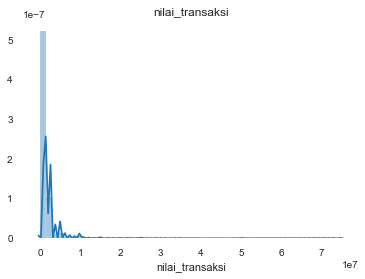



waktu_transaksi
2
[0. 0.]
[0. 0.]
Correlation Ratio: 0.03929372769953314
Not-Normal Distribution
Skewness: -0.2170763505985012, Kurtosis: -0.4579989132630673


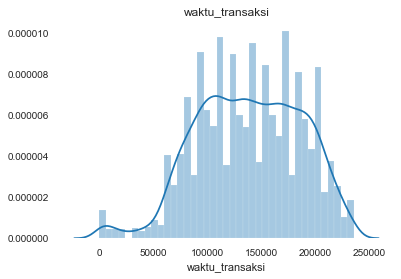



rata_rata_nilai_transaksi
2
[0. 0.]
[0. 0.]
Correlation Ratio: 0.04037701594560865
Not-Normal Distribution
Skewness: 5.371530198300946, Kurtosis: 49.53398301351733


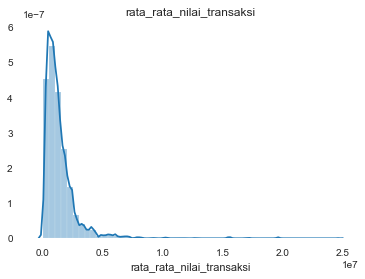



maksimum_nilai_transaksi
2
[0. 0.]
[0. 0.]
Correlation Ratio: 0.0142162221027146
Not-Normal Distribution
Skewness: 2.750055886452236, Kurtosis: 8.504596885856383


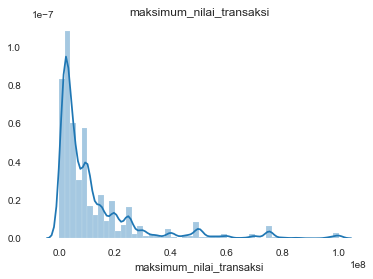



minimum_nilai_transaksi
2
[0. 0.]
[0. 0.]
Correlation Ratio: 0.06981987984523631
Not-Normal Distribution
Skewness: 98.72685280473583, Kurtosis: 10637.861506673888


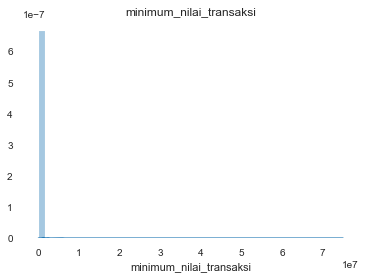



rata_rata_jumlah_transaksi
2
[0. 0.]
[0. 0.]
Correlation Ratio: 0.05718497576698442
Not-Normal Distribution
Skewness: 5.144820462175636, Kurtosis: 48.94119600965223


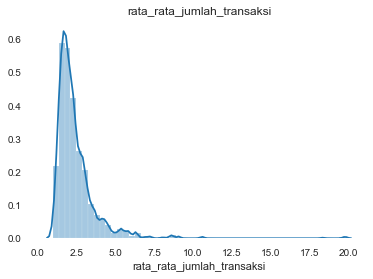



flag_transaksi_fraud
2
[0. 0.]
[0. 0.]
Correlation Ratio: 1.0
Not-Normal Distribution
Skewness: 3.390807498282994, Kurtosis: 9.497575490412173


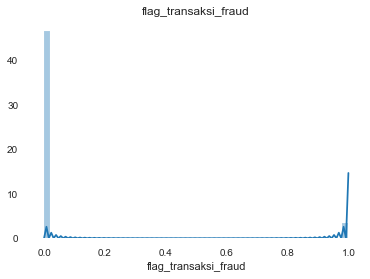

In [20]:
from scipy.stats import shapiro, anderson, skew, kurtosis
for i in dfTrain1.select_dtypes(exclude='object').columns:
    print(i)
    print('Correlation Ratio: {}'.format(correlation_ratio(dfTrain1['flag_transaksi_fraud'],dfTrain1[i])))
    if shapiro(dfTrain1[i])[1] < 0.05:
        print('Not-Normal Distribution')
    else:
        print('Normal Distribution')
    print('Skewness: {}, Kurtosis: {}'.format(skew(dfTrain1[i]), kurtosis(dfTrain1[i])))
    sns.distplot(dfTrain1[i])
    plt.title(i)
    plt.show()
    print('\n')

In [21]:
dfTrain1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 16 columns):
tipe_kartu                    13125 non-null object
tipe_mesin                    13125 non-null object
tipe_transaksi                13125 non-null object
nilai_transaksi               13125 non-null float64
id_negara                     13125 non-null object
nama_kota                     13125 non-null object
lokasi_mesin                  13125 non-null object
waktu_transaksi               13125 non-null int64
kuartal_transaksi             13125 non-null object
kepemilikan_kartu             13125 non-null object
id_channel                    13125 non-null object
rata_rata_nilai_transaksi     13125 non-null float64
maksimum_nilai_transaksi      13125 non-null float64
minimum_nilai_transaksi       13125 non-null float64
rata_rata_jumlah_transaksi    13125 non-null float64
flag_transaksi_fraud          13125 non-null int64
dtypes: float64(5), int64(2), object(9)
memory usage: 1.

# Hypothesis Testing

In [22]:
# Chi-square Test of Independence
# The H0 (Null Hypothesis): There is no relationship between variable one and variable two.
# The H1 (Alternative Hypothesis): There is a relationship between variable 1 and variable 2.

categorical_columns = ['tipe_kartu', 'tipe_mesin', 'tipe_transaksi', 'id_negara', 'nama_kota', 'lokasi_mesin', 'kuartal_transaksi',
          'kepemilikan_kartu', 'id_channel']
from scipy.stats import chi2_contingency
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(dfTrain1['flag_transaksi_fraud'], dfTrain1[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')

res = pd.DataFrame(data = [categorical_columns, chi2_check]).T
res.columns=['Column', 'Hypothesis']
res

Column                      Hypothesis
0         tipe_kartu          Reject Null Hypothesis
1         tipe_mesin  Fail to Reject Null Hypothesis
2     tipe_transaksi          Reject Null Hypothesis
3          id_negara          Reject Null Hypothesis
4          nama_kota          Reject Null Hypothesis
5       lokasi_mesin          Reject Null Hypothesis
6  kuartal_transaksi          Reject Null Hypothesis
7  kepemilikan_kartu          Reject Null Hypothesis
8         id_channel          Reject Null Hypothesis

In [27]:
# Post-Hoc Test
# Nilai P-Value dibagi berdasarkan nunique dari fitur
check = {}
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    dummies = pd.get_dummies(dfTrain1[i])
    bon_p_value = 0.05/dfTrain1[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(dfTrain1['flag_transaksi_fraud'], dummies[series]))[1] < bon_p_value:
            check['{}+{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}+{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'

res_chi = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi.columns = ['Pair', 'Hypothesis']
res_chi

Pair                      Hypothesis
0            tipe_kartu+0  Fail to Reject Null Hypothesis
1            tipe_kartu+1  Fail to Reject Null Hypothesis
2            tipe_kartu+2  Fail to Reject Null Hypothesis
3            tipe_kartu+3  Fail to Reject Null Hypothesis
4            tipe_kartu+4          Reject Null Hypothesis
...                   ...                             ...
6095  kepemilikan_kartu+2          Reject Null Hypothesis
6096         id_channel+3  Fail to Reject Null Hypothesis
6097         id_channel+4          Reject Null Hypothesis
6098         id_channel+8          Reject Null Hypothesis
6099         id_channel+9          Reject Null Hypothesis

[6100 rows x 2 columns]

In [28]:
res_chi[res_chi['Hypothesis'] == 'Reject Null Hypothesis']

Pair              Hypothesis
4            tipe_kartu+4  Reject Null Hypothesis
8           tipe_kartu+93  Reject Null Hypothesis
14      tipe_transaksi+26  Reject Null Hypothesis
15      tipe_transaksi+58  Reject Null Hypothesis
17     tipe_transaksi+148  Reject Null Hypothesis
19     tipe_transaksi+156  Reject Null Hypothesis
20     tipe_transaksi+158  Reject Null Hypothesis
21     tipe_transaksi+159  Reject Null Hypothesis
26     tipe_transaksi+238  Reject Null Hypothesis
28     tipe_transaksi+385  Reject Null Hypothesis
30     tipe_transaksi+440  Reject Null Hypothesis
34           id_negara+-2  Reject Null Hypothesis
38           id_negara+73  Reject Null Hypothesis
39           id_negara+96  Reject Null Hypothesis
41          id_negara+149  Reject Null Hypothesis
47            nama_kota+1  Reject Null Hypothesis
51            nama_kota+7  Reject Null Hypothesis
52            nama_kota+8  Reject Null Hypothesis
79           nama_kota+51  Reject Null Hypothesis
103          nama_kota+78  Reject Null Hypothesis
105          nama_kota+80  Reject Null Hypothesis
142         nama_kota+128  Reject Null Hypothesis
146         nama_kota+133  Reject Null Hypothesis
165         nama_kota+153  Reject Null Hypothesis
211         nama_kota+214  Reject Null Hypothesis
224         nama_kota+229  Reject Null Hypothesis
233         nama_kota+240  Reject Null Hypothesis
261         nama_kota+270  Reject Null Hypothesis
326       lokasi_mesin+84  Reject Null Hypothesis
388      lokasi_mesin+179  Reject Null Hypothesis
673      lokasi_mesin+596  Reject Null Hypothesis
1147    lokasi_mesin+1264  Reject Null Hypothesis
1149    lokasi_mesin+1267  Reject Null Hypothesis
2956    lokasi_mesin+3800  Reject Null Hypothesis
3989    lokasi_mesin+5286  Reject Null Hypothesis
4252    lokasi_mesin+5667  Reject Null Hypothesis
4285    lokasi_mesin+5720  Reject Null Hypothesis
6090  kuartal_transaksi+1  Reject Null Hypothesis
6093  kuartal_transaksi+4  Reject Null Hypothesis
6094  kepemilikan_kartu+1  Reject Null Hypothesis
6095  kepemilikan_kartu+2  Reject Null Hypothesis
6097         id_channel+4  Reject Null Hypothesis
6098         id_channel+8  Reject Null Hypothesis
6099         id_channel+9  Reject Null Hypothesis

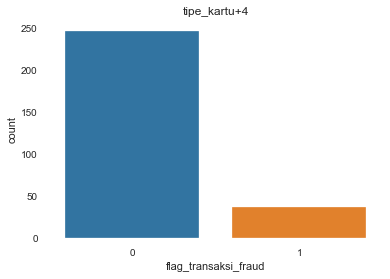

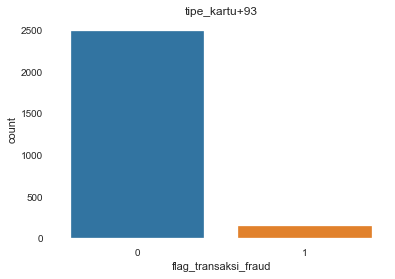

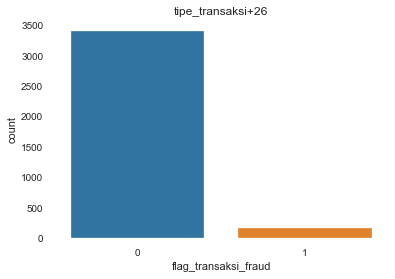

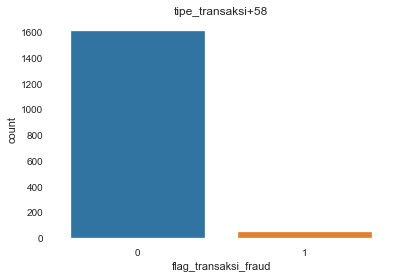

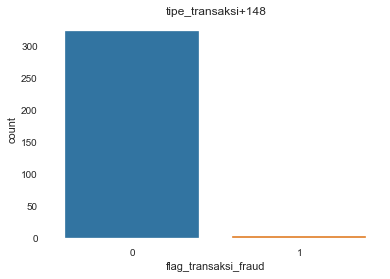

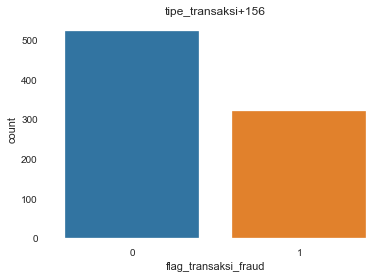

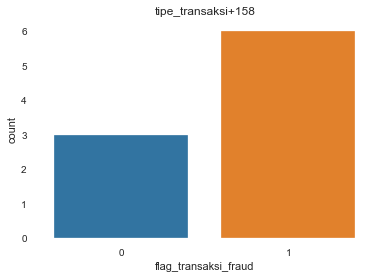

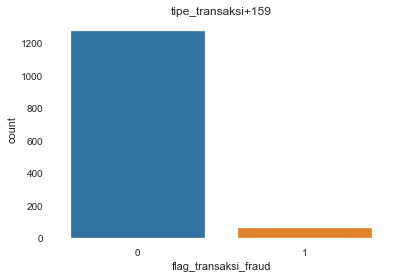

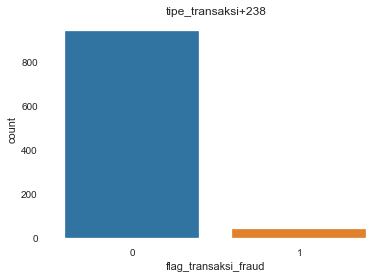

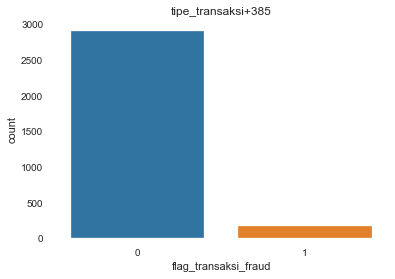

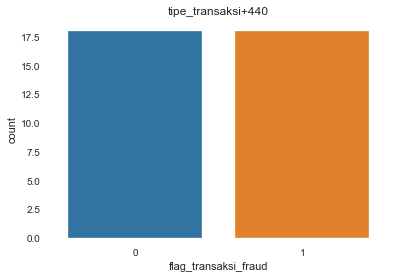

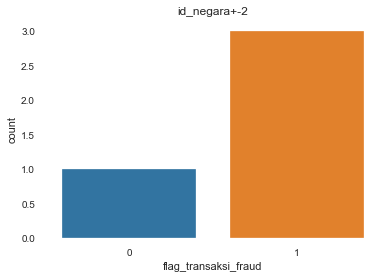

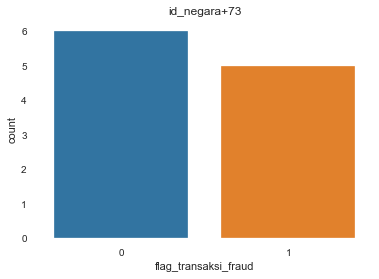

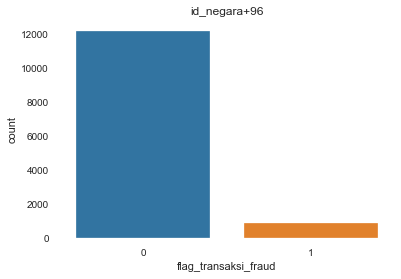

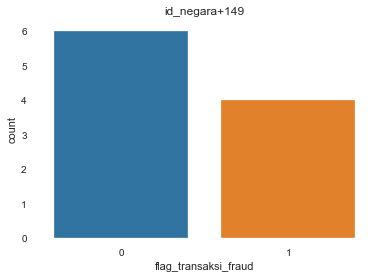

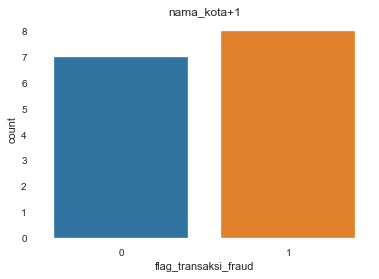

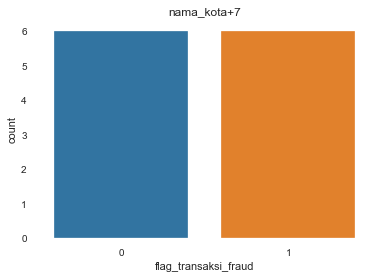

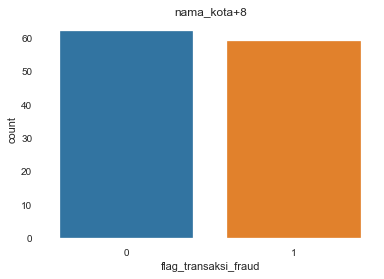

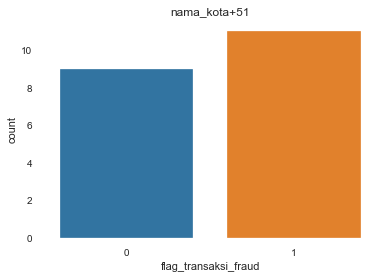

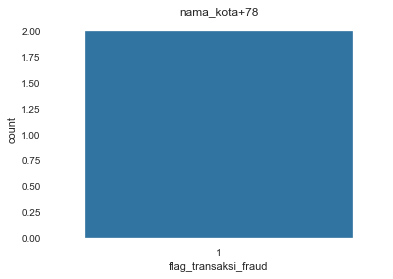

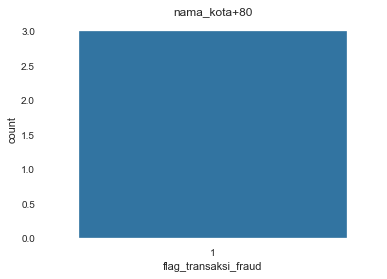

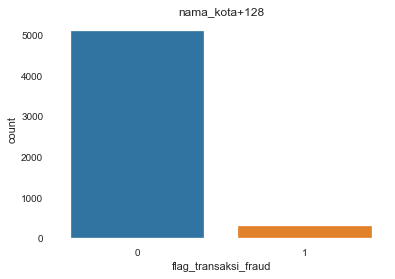

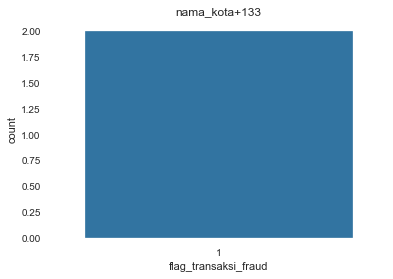

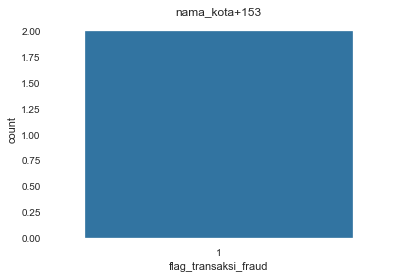

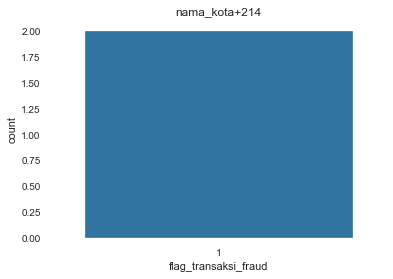

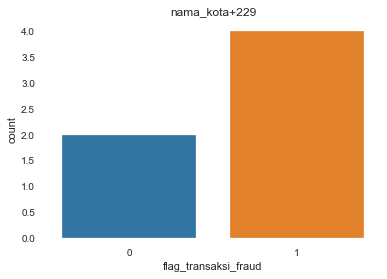

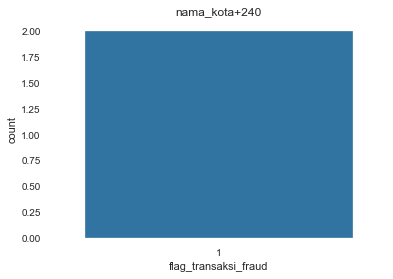

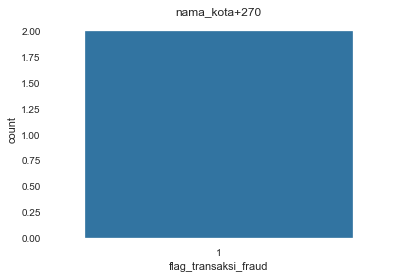

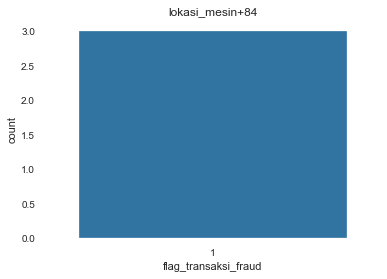

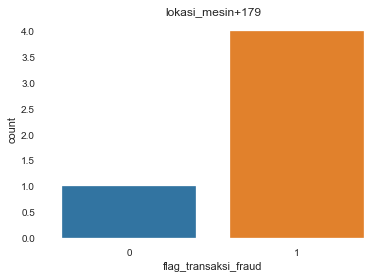

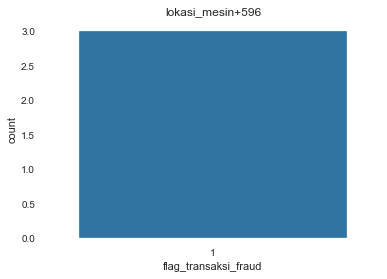

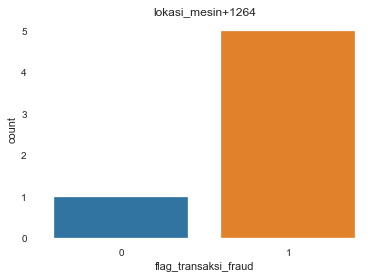

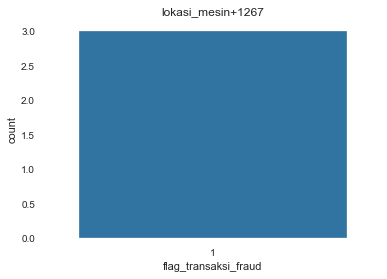

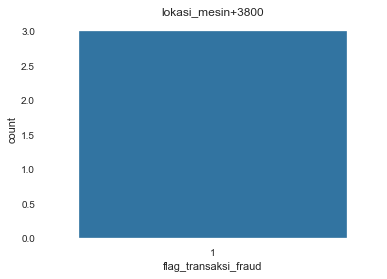

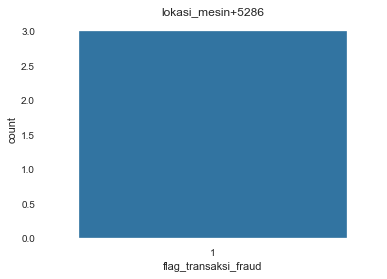

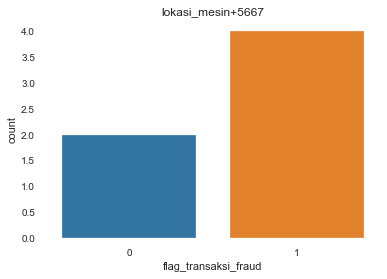

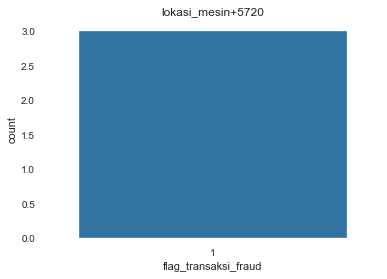

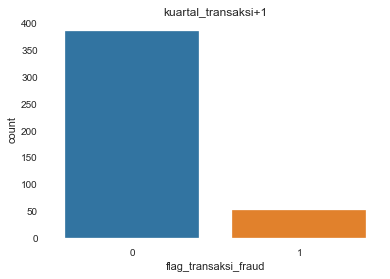

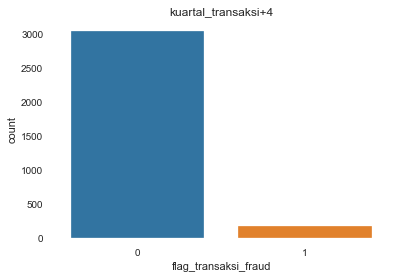

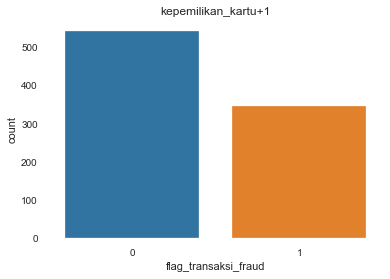

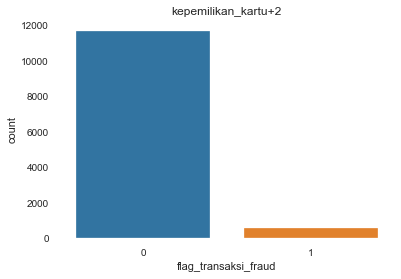

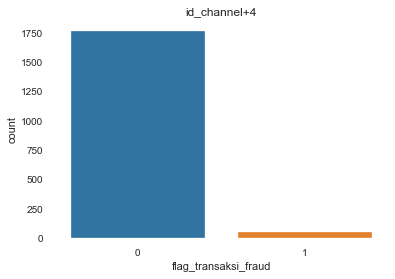

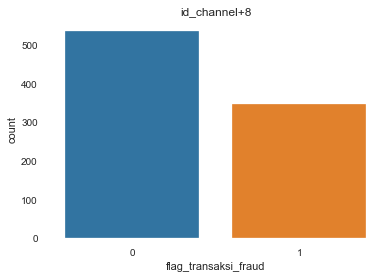

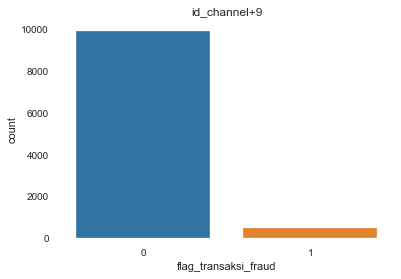

In [30]:
for i in res_chi[res_chi['Hypothesis'] == 'Reject Null Hypothesis']['Pair']:
    sns.countplot(dfTrain1[dfTrain1[i.split('+')[0]] == int(i.split('+')[1])]['flag_transaksi_fraud'])
    plt.title(i)
    plt.show()

In [31]:
from scipy.stats import mannwhitneyu
ava_n = []
for i in dfTrain1.select_dtypes(exclude='object').columns:
    print(i)
    if mannwhitneyu(dfTrain1[dfTrain1['flag_transaksi_fraud'] == 0][i],
                    dfTrain1[dfTrain1['flag_transaksi_fraud'] == 1][i])[1] < 0.05:
        print('Reject Null Hypothesis')
        ava_n.append(i)
    else:
        print('Fail to Reject Null Hypothesis')
    print('\n')
ava_n

nilai_transaksi
Reject Null Hypothesis


waktu_transaksi
Reject Null Hypothesis


rata_rata_nilai_transaksi
Fail to Reject Null Hypothesis


maksimum_nilai_transaksi
Reject Null Hypothesis


minimum_nilai_transaksi
Reject Null Hypothesis


rata_rata_jumlah_transaksi
Reject Null Hypothesis


flag_transaksi_fraud
Reject Null Hypothesis




['nilai_transaksi',
 'waktu_transaksi',
 'maksimum_nilai_transaksi',
 'minimum_nilai_transaksi',
 'rata_rata_jumlah_transaksi',
 'flag_transaksi_fraud']

# 050320

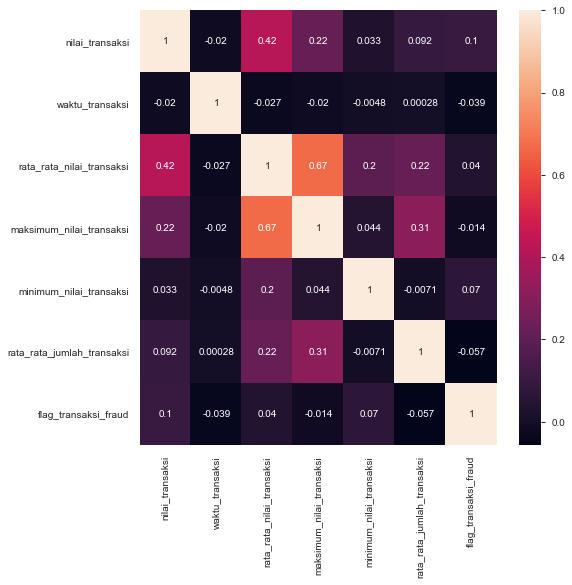

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(dfTrain1.corr(), annot=True)

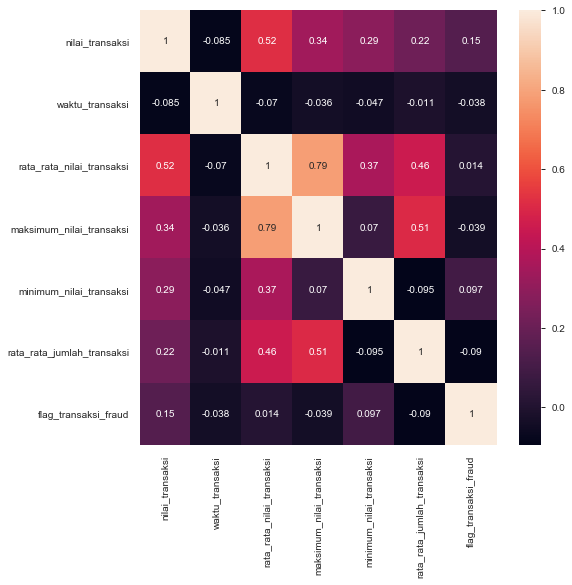

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(dfTrain1.corr('spearman'), annot=True)

In [34]:
dfTrain1.corr()

nilai_transaksi  waktu_transaksi  \
nilai_transaksi                    1.000000        -0.019932   
waktu_transaksi                   -0.019932         1.000000   
rata_rata_nilai_transaksi          0.420864        -0.026529   
maksimum_nilai_transaksi           0.219718        -0.019782   
minimum_nilai_transaksi            0.032677        -0.004798   
rata_rata_jumlah_transaksi         0.092121         0.000284   
flag_transaksi_fraud               0.101296        -0.039294   

                            rata_rata_nilai_transaksi  \
nilai_transaksi                              0.420864   
waktu_transaksi                             -0.026529   
rata_rata_nilai_transaksi                    1.000000   
maksimum_nilai_transaksi                     0.672401   
minimum_nilai_transaksi                      0.195110   
rata_rata_jumlah_transaksi                   0.222293   
flag_transaksi_fraud                         0.040377   

                            maksimum_nilai_transaksi  minimum_nilai_transaksi  \
nilai_transaksi                             0.219718                 0.032677   
waktu_transaksi                            -0.019782                -0.004798   
rata_rata_nilai_transaksi                   0.672401                 0.195110   
maksimum_nilai_transaksi                    1.000000                 0.043721   
minimum_nilai_transaksi                     0.043721                 1.000000   
rata_rata_jumlah_transaksi                  0.310385                -0.007128   
flag_transaksi_fraud                       -0.014216                 0.069820   

                            rata_rata_jumlah_transaksi  flag_transaksi_fraud  
nilai_transaksi                               0.092121              0.101296  
waktu_transaksi                               0.000284             -0.039294  
rata_rata_nilai_transaksi                     0.222293              0.040377  
maksimum_nilai_transaksi                      0.310385             -0.014216  
minimum_nilai_transaksi                      -0.007128              0.069820  
rata_rata_jumlah_transaksi                    1.000000             -0.057185  
flag_transaksi_fraud                         -0.057185              1.000000

In [35]:
dfcv

Column  Cramers_v
8         id_channel   0.342861
2     tipe_transaksi   0.341800
7  kepemilikan_kartu   0.339915
5       lokasi_mesin   0.319590
4          nama_kota   0.288062
3          id_negara   0.069565
0         tipe_kartu   0.058180
6  kuartal_transaksi   0.044685
1         tipe_mesin   0.000000

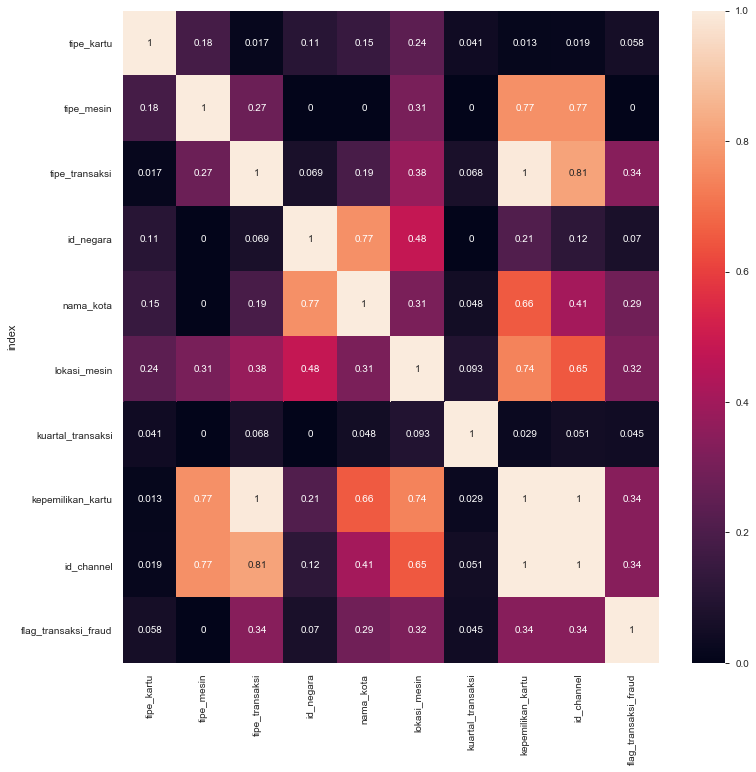

In [36]:
# Ubah kategorikal jadi tipe object
kol = ['tipe_kartu', 'tipe_mesin', 'tipe_transaksi', 'id_negara', 'nama_kota', 'lokasi_mesin', 'kuartal_transaksi',
          'kepemilikan_kartu', 'id_channel','flag_transaksi_fraud']
cv = {}
for i in kol:
    temp = []
    for j in kol:
        k = cramers_v(dfTrain1[i], dfTrain1[j])
        temp.append(k)
    cv[i] = temp
dfcv1 = pd.DataFrame.from_dict(cv)
dfcv1['index'] = dfcv1.columns
dfcv1.set_index('index', inplace=True)
plt.figure(figsize=(12,12))
sns.heatmap(dfcv1, annot=True)

In [37]:
dfTrain_dummies = pd.get_dummies(data=dfTrain1, columns = list(dfTrain1.select_dtypes(exclude='number')))
dfTrain_dummies

nilai_transaksi  waktu_transaksi  rata_rata_nilai_transaksi  \
0            2200000.0           193955               1.332293e+06   
1            2500000.0            73140               1.369048e+06   
2            1200000.0           140216               1.552346e+07   
3             320000.0           155117               7.117647e+05   
4             150000.0           143339               6.179683e+05   
...                ...              ...                        ...   
13120         100000.0           140547               2.917987e+06   
13121        2500000.0           172446               1.914437e+06   
13122        1250000.0           141836               3.417045e+05   
13123         500000.0            71451               7.644508e+05   
13124         300000.0           175350               8.483696e+05   

       maksimum_nilai_transaksi  minimum_nilai_transaksi  \
0                     9750000.0                  10000.0   
1                    10000000.0                  30000.0   
2                   100000000.0                  41804.0   
3                     6884408.0                  10000.0   
4                     2500000.0                 100000.0   
...                         ...                      ...   
13120                 7400000.0                  26500.0   
13121                20000000.0                 100000.0   
13122                 1000000.0                 100000.0   
13123                 3000000.0                  25000.0   
13124                 6375000.0                  25000.0   

       rata_rata_jumlah_transaksi  flag_transaksi_fraud  tipe_kartu_0  \
0                            2.73                     0             0   
1                            2.33                     1             0   
2                            2.40                     0             0   
3                            1.98                     0             0   
4                            1.46                     0             1   
...                           ...                   ...           ...   
13120                        2.57                     0             0   
13121                        2.73                     0             0   
13122                        1.33                     1             0   
13123                        1.62                     0             0   
13124                        1.79                     0             0   

       tipe_kartu_1  tipe_kartu_2  tipe_kartu_3  tipe_kartu_4  tipe_kartu_5  \
0                 0             0             0             0             0   
1                 0             0             0             0             0   
2                 0             1             0             0             0   
3                 0             0             0             0             0   
4                 0             0             0             0             0   
...             ...           ...           ...           ...           ...   
13120             0             0             0             0             0   
13121             0             0             0             0             0   
13122             0             0             0             0             0   
13123             0             0             0             0             0   
13124             0             0             0             0             0   

       tipe_kartu_24  tipe_kartu_28  tipe_kartu_93  tipe_kartu_103  \
0                  0              0              0               0   
1                  0              0              0               0   
2                  0              0              0               0   
3                  0              0              0               1   
4                  0              0              0               0   
...              ...            ...            ...             ...   
13120              0              0              0               0   
13121              0              0              0         

In [50]:
used_c = res_chi[res_chi['Hypothesis'] == 'Reject Null Hypothesis']['Pair'].values
used_x = []
for i in used_c:
#     print(i)
    i=i.replace('+','_')
    used_x.append(i)
#     print(i)
used_x

['tipe_kartu_4',
 'tipe_kartu_93',
 'tipe_transaksi_26',
 'tipe_transaksi_58',
 'tipe_transaksi_148',
 'tipe_transaksi_156',
 'tipe_transaksi_158',
 'tipe_transaksi_159',
 'tipe_transaksi_238',
 'tipe_transaksi_385',
 'tipe_transaksi_440',
 'id_negara_-2',
 'id_negara_73',
 'id_negara_96',
 'id_negara_149',
 'nama_kota_1',
 'nama_kota_7',
 'nama_kota_8',
 'nama_kota_51',
 'nama_kota_78',
 'nama_kota_80',
 'nama_kota_128',
 'nama_kota_133',
 'nama_kota_153',
 'nama_kota_214',
 'nama_kota_229',
 'nama_kota_240',
 'nama_kota_270',
 'lokasi_mesin_84',
 'lokasi_mesin_179',
 'lokasi_mesin_596',
 'lokasi_mesin_1264',
 'lokasi_mesin_1267',
 'lokasi_mesin_3800',
 'lokasi_mesin_5286',
 'lokasi_mesin_5667',
 'lokasi_mesin_5720',
 'kuartal_transaksi_1',
 'kuartal_transaksi_4',
 'kepemilikan_kartu_1',
 'kepemilikan_kartu_2',
 'id_channel_4',
 'id_channel_8',
 'id_channel_9']

In [56]:
used_n = ava_n.copy()
used_n.extend(used_x)
dfTrain_dummies1 = dfTrain_dummies[used_n]
dfTrain3 = dfTrain_dummies1.copy()
dfTrain3

nilai_transaksi  waktu_transaksi  maksimum_nilai_transaksi  \
0            2200000.0           193955                 9750000.0   
1            2500000.0            73140                10000000.0   
2            1200000.0           140216               100000000.0   
3             320000.0           155117                 6884408.0   
4             150000.0           143339                 2500000.0   
...                ...              ...                       ...   
13120         100000.0           140547                 7400000.0   
13121        2500000.0           172446                20000000.0   
13122        1250000.0           141836                 1000000.0   
13123         500000.0            71451                 3000000.0   
13124         300000.0           175350                 6375000.0   

       minimum_nilai_transaksi  rata_rata_jumlah_transaksi  \
0                      10000.0                        2.73   
1                      30000.0                        2.33   
2                      41804.0                        2.40   
3                      10000.0                        1.98   
4                     100000.0                        1.46   
...                        ...                         ...   
13120                  26500.0                        2.57   
13121                 100000.0                        2.73   
13122                 100000.0                        1.33   
13123                  25000.0                        1.62   
13124                  25000.0                        1.79   

       flag_transaksi_fraud  tipe_kartu_4  tipe_kartu_93  tipe_transaksi_26  \
0                         0             0              0                  1   
1                         1             0              0                  0   
2                         0             0              0                  0   
3                         0             0              0                  0   
4                         0             0              0                  1   
...                     ...           ...            ...                ...   
13120                     0             0              0                  0   
13121                     0             0              0                  1   
13122                     1             0              0                  0   
13123                     0             0              0                  1   
13124                     0             0              0                  0   

       tipe_transaksi_58  tipe_transaksi_148  tipe_transaksi_156  \
0                      0                   0                   0   
1                      0                   0                   1   
2                      0                   0                   1   
3                      1                   0                   0   
4                      0                   0                   0   
...                  ...                 ...                 ...   
13120                  0                   0                   0   
13121                  0                   0                   0   
13122                  0                   0                   1   
13123                  0                   0                   0   
13124                  0                   0                   0   

       tipe_transaksi_158  tipe_transaksi_159  tipe_transaksi_238  \
0                       0                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   0                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
13120                   0                   0                   0   
13121                   0                   0                   0   
13122                   0                   0 

In [57]:
from sklearn.model_selection import train_test_split
X = dfTrain3.drop('flag_transaksi_fraud',axis=1)
y = dfTrain3['flag_transaksi_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 5)
dtree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

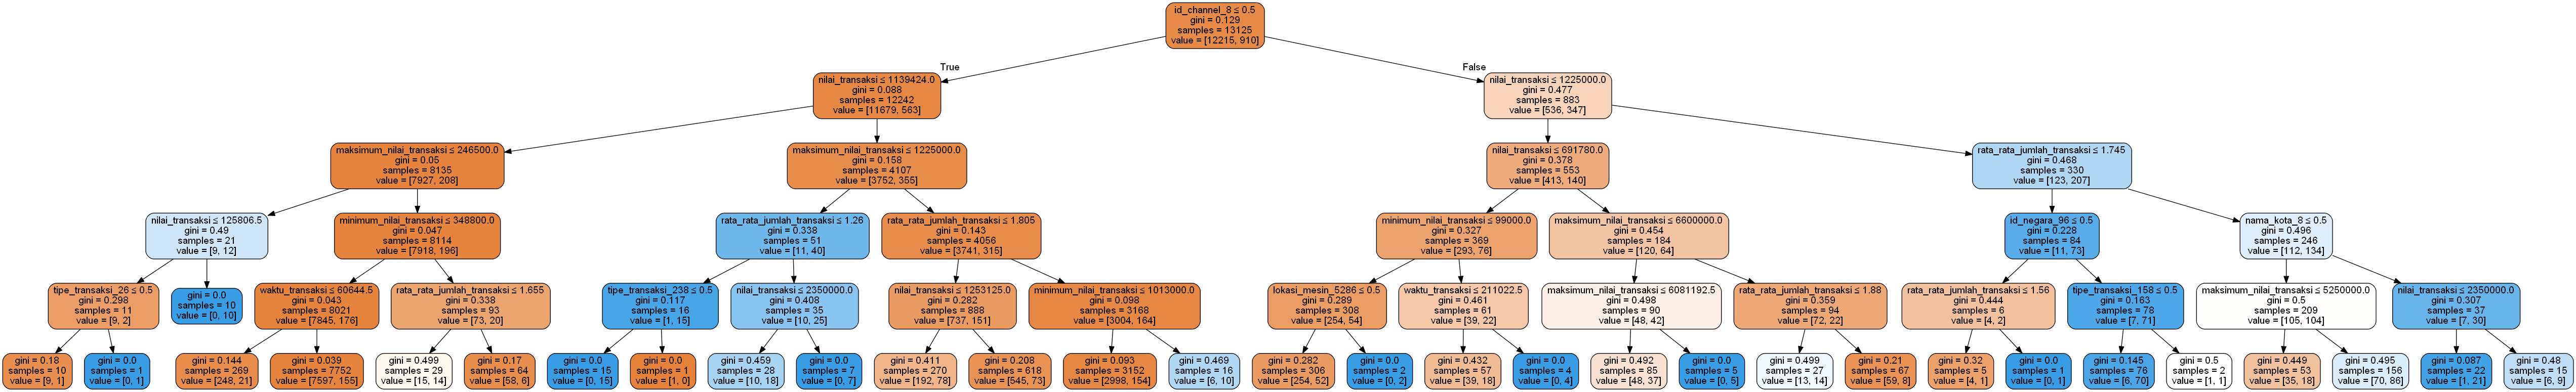

In [59]:
from sklearn.externals.six import StringIO
from IPython.display import Image    
from sklearn.tree import export_graphviz
import pydot

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True, feature_names=X_train.columns,
                special_characters=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
graph
Image(graph[0].create_png())  

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(dfTrain3.drop('flag_transaksi_fraud', axis=1).values,
                                 j) for j in range(dfTrain3.drop('flag_transaksi_fraud', axis=1).shape[1])]
vif_res = pd.Series(vif, index=dfTrain3.drop('flag_transaksi_fraud', axis=1).columns, name='VIF')
vif_res
# Yang dipake < 5 atau 10

C:\Users\Rahmanfp\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


nilai_transaksi                 1.187382
waktu_transaksi                 2.918696
maksimum_nilai_transaksi        1.406048
minimum_nilai_transaksi         1.004267
rata_rata_jumlah_transaksi      1.117781
tipe_kartu_4                    1.011058
tipe_kartu_93                   1.286674
tipe_transaksi_26               3.096780
tipe_transaksi_58               9.703711
tipe_transaksi_148              1.278435
tipe_transaksi_156            113.984258
tipe_transaksi_158              2.444632
tipe_transaksi_159              1.967370
tipe_transaksi_238              1.737066
tipe_transaksi_385              2.907593
tipe_transaksi_440              6.262514
id_negara_-2                    1.295772
id_negara_73                    1.588007
id_negara_96                    2.394990
id_negara_149                   1.537630
nama_kota_1                     1.104902
nama_kota_7                     1.019681
nama_kota_8                     1.228297
nama_kota_51                    1.036543
nama_kota_78    

In [67]:
vif_drop = []
for idx, val in zip(vif_res.index, vif_res):
    if val >10:
        vif_drop.append(idx)

In [68]:
dfTrain3.drop(vif_drop, axis=1, inplace=True)

In [69]:
import statsmodels.api as sm
logit_mode = sm.Logit(dfTrain3['flag_transaksi_fraud'],sm.add_constant(dfTrain3.drop('flag_transaksi_fraud', axis=1)))
result = logit_model.fit()
print(result.summary())

C:\Users\Rahmanfp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


NameError: name 'logit_model' is not defined

In [70]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(dfTrain3.drop('flag_transaksi_fraud', axis=1), dfTrain3['flag_transaksi_fraud'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
pd.Series(log_model.coef_.flatten(), index= dfTrain3.drop('flag_transaksi_fraud', axis=1).columns)

nilai_transaksi               7.289327e-08
waktu_transaksi              -1.809484e-05
maksimum_nilai_transaksi     -2.809424e-08
minimum_nilai_transaksi       8.487397e-07
rata_rata_jumlah_transaksi   -2.735997e-10
tipe_kartu_4                 -9.331794e-13
tipe_kartu_93                -9.227152e-12
tipe_transaksi_26            -4.544676e-11
tipe_transaksi_58            -2.322184e-11
tipe_transaksi_148           -5.568005e-12
tipe_transaksi_158            4.885110e-13
tipe_transaksi_159           -1.409431e-11
tipe_transaksi_238           -1.084814e-11
tipe_transaksi_385           -3.697145e-11
tipe_transaksi_440            1.052948e-12
id_negara_-2                  2.051654e-13
id_negara_73                  3.524741e-13
id_negara_96                 -1.334615e-10
id_negara_149                 2.359773e-13
nama_kota_1                   5.264500e-13
nama_kota_7                   3.426332e-13
nama_kota_8                   3.542234e-12
nama_kota_51                  7.321330e-13
nama_kota_7

### K-Fold

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, log_loss, matthews_corrcoef

In [73]:
data = dfTrain3.drop('flag_transaksi_fraud', axis=1)
target = dfTrain3['flag_transaksi_fraud']

In [89]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train, predictProba)
    return{
        'report' : report,
        'matthew': matt,
        'f1' : f1,
        'roc' : roc_auc,
        'accuracy' : accuracy,
        'confusion' : confMatrix,
        'logloss' : logloss
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test, predictProba)
    return{
        'report' : report,
        'matthew': matt,
        'f1' : f1,
        'roc' : roc_auc,
        'accuracy' : accuracy,
        'confusion' : confMatrix,
        'logloss' : logloss
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [90]:
from sklearn.model_selection import KFold
K = 5
kf = KFold(n_splits = K, shuffle = True, random_state = 42)
# hasilfold = list(kf.split(data,target))
# hasilfold

In [91]:
print(len(hasilfold[0][0]), len(hasilfold[0][1]))

10500 2625


In [95]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data,target):
    
    #Split Data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # Instantiate Model
    logmodel = LogisticRegression()
    
    # Calculate Errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, logmodel)
    
    # Append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [99]:
for i, tr_err, val_err in zip(range(1,6,1), train_errors, validation_errors):
    print('ROC AUC Train ke {} : {}'.format(i, tr_err['roc']))
    print('ROC AUC Validation ke {} : {}'.format(i, val_err['roc']))

ROC AUC Train ke 1 : 0.5833394051628661
ROC AUC Validation ke 1 : 0.5874732121058676
ROC AUC Train ke 2 : 0.5779453430674442
ROC AUC Validation ke 2 : 0.6051702234568018
ROC AUC Train ke 3 : 0.5834605478095132
ROC AUC Validation ke 3 : 0.5899373993761872
ROC AUC Train ke 4 : 0.5797627199204609
ROC AUC Validation ke 4 : 0.5963981967548404
ROC AUC Train ke 5 : 0.5940161562496202
ROC AUC Validation ke 5 : 0.5371224290092684


In [102]:
matrix = []
for i,j in zip(train_errors, validation_errors):
    matrix.append([i['accuracy'], j['accuracy'], i['roc'], j['roc'],
                   i['f1'], j['f1'], i['matthew'], j['matthew'], i['logloss'], j['logloss']])
calc_matrix = pd.DataFrame(matrix, columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC',
                                              'Train F1 Score', 'Test F1 Score', 'Train Matthews Corr Coef', 'Test Matthews Corr Coef',
                                              'Train Log Loss', 'Test Log Loss'])
average = []
for i in calc_matrix.columns:
    average.append(calc_matrix[i].mean())

average_mat = pd.DataFrame(average).T
average_mat.columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC',
                                              'Train F1 Score', 'Test F1 Score', 'Train Matthews Corr Coef', 'Test Matthews Corr Coef',
                                              'Train Log Loss', 'Test Log Loss']
index_label = []
for i in range(1, len(calc_matrix)+1):
    index_label.append(f'{i} Iteration')
index_label.append('Average')
calculation = pd.concat([calc_matrix, average_mat])
calculation.index = index_label
calculation

Train Accuracy  Test Accuracy  Train ROC AUC  Test ROC AUC  \
1 Iteration        0.929429       0.930667       0.583339      0.587473   
2 Iteration        0.929143       0.932571       0.577945      0.605170   
3 Iteration        0.930000       0.928000       0.583461      0.589937   
4 Iteration        0.930667       0.926476       0.579763      0.596398   
5 Iteration        0.929524       0.930667       0.594016      0.537122   
Average            0.929752       0.929676       0.583705      0.583220   

             Train F1 Score  Test F1 Score  Train Matthews Corr Coef  \
1 Iteration        0.497376       0.517709                  0.060898   
2 Iteration        0.499744       0.498927                  0.076139   
3 Iteration        0.502697       0.496690                  0.075519   
4 Iteration        0.500538       0.495970                  0.070367   
5 Iteration        0.502434       0.492783                  0.081574   
Average            0.500558       0.500416                  0.072899   

             Test Matthews Corr Coef  Train Log Loss  Test Log Loss  
1 Iteration                 0.118997        0.265150       0.262919  
2 Iteration                 0.054320        0.268181       0.250903  
3 Iteration                 0.065293        0.263456       0.269699  
4 Iteration                 0.078212        0.263156       0.270876  
5 Iteration                 0.036207        0.263348       0.270120  
Average                     0.070606        0.264658       0.264903